# <p style="text-align: center;">Winc Academy – Data Analytics with Python</p>
### <p style="text-align: center;">Second Jupyter Notebook as supplement to<br><br>Report prepared for final assignment:  Module 7 – CO<sub>2</sub> emissions</p>

<p style="text-align: center;">by M. Schotten, May 2023</p>
<br><br>

### <p style="text-align: center;">Question 3:&nbsp;&nbsp; *Which non-fossil fuel energy technology will have the best price in the future?*</p>
<br><br>



In [1]:
# Winc Academy Module 7 Assignment text:
# ______________________________________
# 
# 
# ***********************************************************************************
# 
#          Final assignment - CO2 emissions - Q3
# 
# This is your final assignment. You'll get a lot of freedom in doing
# this assignment but that also means you have to make choices and 
# explain the reasoning behind those choices in your report.

# For this assignment you can use any dataset you can find from
# the Our World in Data website:  https://ourworldindata.org/
# 
# Please formulate an answer to the following three questions in your report.
# 
#  1. What is the biggest predictor of a large CO2 output per capita of a country?
#  2. Which countries are making the biggest strides in decreasing CO2 output?
#  3. Which non-fossil fuel energy technology will have the best price in the future?


#           1: Biggest predictor of CO2 output
# 
# To determine this you may want to consider things like GDP per capita, 
# diets, number of cars per capita, various energy sources, mobility and
# other factors.
# 
# Your answer can also be a specific combination of certain factors.


#           2: Biggest strides in decreasing CO2 output
# 
# You'll need to find the relative CO2 output for each country
# to be able to calculate this. But countries can have growing
# and shrinking populations too, so it's probably a good idea 
# to take this into account as well.


#           3: Best future price for non-fossil fuel energy
# 
# To be able to predict prices you'll probably need to use linear regression
# over the various non-fossil fuel options.


# Submitting
# Please submit both your written report and all notebooks you've created
# in creating the report. Make sure everything works before submitting.
# 
# 
# ***********************************************************************************


# --------------------------------------------------------------------------------------------------
# P.S. A partial "Answer" to Q1 can also be found in these OWID datasets:
# 
#  * https://ourworldindata.org/emissions-by-sector#per-capita-co2-where-do-our-emissions-come-from
#       file: per-capita-co2-sector.csv
#  * https://ourworldindata.org/
#           emissions-by-sector#sector-by-sector-where-do-global-greenhouse-gas-emissions-come-from
#       file: Global-GHG-Emissions-by-sector-based-on-WRI-2020.xlsx



In [2]:
# INITIALIZING

import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt

# Needed for the color cycler for custom plotting:
import matplotlib as mpl
from cycler import cycler

# Needed for the manipulation of tick marks in the charts:
import matplotlib.ticker
from matplotlib.ticker import AutoMinorLocator

# Needed to make plots display at a decent size:
plt.rcdefaults()

# Needed to make large values in itables (library
# will be imported in later cell) display properly,
# i.e., not rounded:
pd.set_option("display.precision", 10)

# Regex module can be used to search for substrings:
import re

# String module to create a set of letters in alphabetical
# order later on:
import string

# SciPy library Pearson correlation module: 
from scipy.stats import pearsonr

# # Or less common alternative, pingouin library correlation module;
# # but may need to be installed first, via: 
# # !pip install pingouin 
# # Commented out for this reason, but is a viable alternative:
# 
# from pingouin import corr


In [3]:
# READING IN RELEVANT DATA FILE
# 
# 
# Downloaded from Our World In Data (OWID)in December 2022, from:
# https://ourworldindata.org/grapher/levelized-cost-of-energy
# 
# Github folder where I stored all downloaded OWID datasets,
# to make the results & charts from this Jupyter Notebook predictable
# and consistent:
base_url = 'https://github.com/MikeSchotten/CO2_emissions/raw/main/datasets/'
# 
# P.S. if needed, this OWID dataset can always be updated
# in the future, e.g. to include more recent data, once available.

file_dir_LCOE = f"{base_url}levelized-cost-of-energy.csv"

# Read in the data CSV file:
df_raw_LCOE = pd.read_csv(file_dir_LCOE, encoding="utf-8")

# Show Dataframe:
display(df_raw_LCOE)


,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423956700,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691420,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030230,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150156900,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621404,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.20773248
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.18573205
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.16313075
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.15288077


In [4]:
# USING & INITIALIZING ITABLES
# 
# 
# --------------------------------------------------------
# NOTE TO WINC INSTRUCTORS:
# 
# The following code won't work if you haven't 
# installed the itables library on your machine.  
# 
# Therefore, I have commented this cell out.
# 
# If you do have itables installed and want to use it,
# you can undo the commenting.
# 
# And itables can be installed with:
# 
#     pip install itables
# 
# --------------------------------------------------------


# # The itables library has similar functionality as G. Colabs Data Tables,
# # and needs to have been installed beforehand.
# # Documentation: https://mwouts.github.io/itables/quick_start.html

# from itables import init_notebook_mode, show
# init_notebook_mode(all_interactive=False)
# # init_notebook_mode(all_interactive=True)

# import itables.options as opt
# opt.order = []  # No sorting by default; so display DF exactly as the original CSV file
# opt.classes = ["display", "cell-border"]   # Show borders between table cells
# opt.lengthMenu = [5, 7, 10, 20, 50, 100, 200]  # Customize menu with nr. of rows shown per page
# opt.column_filters = "footer"  # Show filters at bottom of table

# # Set column width; if you don't do this, the column headers and data become illegible.
# opt.columnDefs = [{"width": "75px", "targets": "_all"}]

# # Set option to display ALL columns 
# # (default = pd.get_option('display.max_columns') = 20 columns max):
# opt.maxColumns = 0


In [5]:
# INITIAL INSPECTION OF DF VIA ITABLES:

# show(
#     df_raw_LCOE,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_raw_LCOE)


,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423956700,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691420,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030230,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150156900,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621404,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.20773248
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.18573205
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.16313075
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.15288077


In [6]:
# SELECT ONLY DATA FOR WORLD


# The data file contains LCOE data for some individual countries
# as well as for the entire world.  Only for the world are LCOE
# data available for all the non-fossil fuel energy technologies, and 
# most technologies don't have LCOE data for individual countries.
# 
# Therefore, just looking at the LCOE data for the entire world
# is the most straightforward way to answer Q3, so drop data
# for the other countries.
# 
# Also set 'Year' as the index and sort by year:
df_LCOE = df_raw_LCOE.loc[
    df_raw_LCOE['Entity']=='World'
].set_index(
    'Year'
).sort_index()

# Drop capital of the 'Year' index name:
df_LCOE = df_LCOE.rename_axis(
    index=str.lower
)

# Drop 2 columns that have now become redundant:
df_LCOE = df_LCOE.drop(
    columns=['Entity', 'Code']
)

# Rename columns for easier reference:
df_LCOE = df_LCOE.rename(columns={
    'Bioenergy levelized cost of energy': 'bioenergy',
    'Geothermal levelized cost of energy': 'geothermal',
    'Offshore wind levelized cost of energy': 'offshore_wind',
    'Solar photovoltaic levelized cost of energy': 'solar_photovoltaic',
    'Concentrated solar power levelized cost of energy': 'solar_concentrated',
    'Hydropower levelized cost of energy': 'hydropower',
    'Onshore wind levelized cost of energy': 'onshore_wind',
})

# For easier top-to-bottom reading of the legend labels in
# the subsequent plots, order the columns (i.e., from left 
# to right) by descending order of their LCOE data in 2010:

column_order = df_LCOE.loc[
    2010
].sort_values(
    ascending=False
).index
df_LCOE = df_LCOE.reindex(columns=column_order)

# Check result:
# show(
#     df_LCOE,
#     scrolly="1000px",
#     maxBytes=0
# )
display(df_LCOE)

# Or alternatively, if we wanted the years as columns,
# we could take the transpose:
# show(
#     df_LCOE.T,
#     scrolly="1000px",
#     maxBytes=0
# )
# display(df_LCOE.T)


,solar_photovoltaic,solar_concentrated,offshore_wind,onshore_wind,bioenergy,geothermal,hydropower
year,,,,,,,
1983,NaN,NaN,NaN,0.327850820,NaN,NaN,NaN
1984,NaN,NaN,NaN,0.320073870,NaN,NaN,NaN
1985,NaN,NaN,NaN,0.297221400,NaN,NaN,NaN
1986,NaN,NaN,NaN,0.264194200,NaN,NaN,NaN
1987,NaN,NaN,NaN,0.256419700,NaN,NaN,NaN
1988,NaN,NaN,NaN,0.212157380,NaN,NaN,NaN
1989,NaN,NaN,NaN,0.196434680,NaN,NaN,NaN
1990,NaN,NaN,NaN,0.208687600,NaN,NaN,NaN
1991,NaN,NaN,NaN,0.200317080,NaN,NaN,NaN


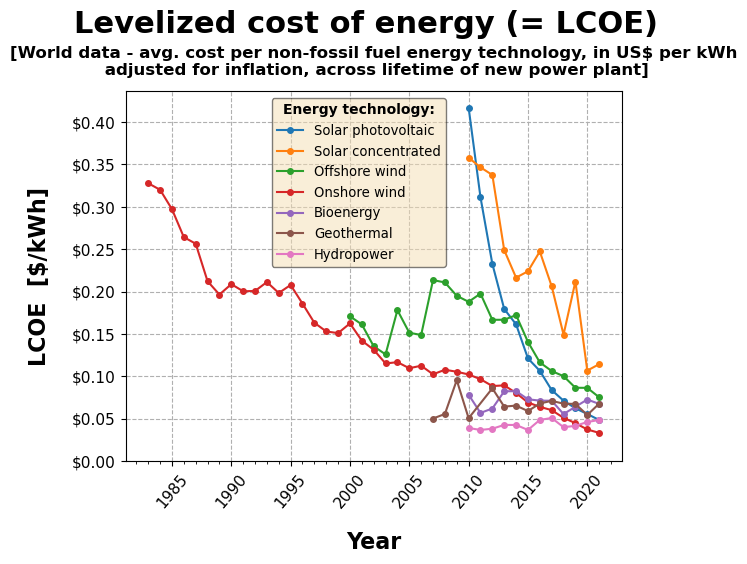

In [7]:
# PLOTTING THE DATA BY ENERGY TYPE


# -----------------------------------------------------
# Note: in the below cells, the data will be plotted in
# several steps, i.e. multiple charts of the same data:
# 
#  1) the data "as is", for initial inspection
#  2) a plot with logarithmic y-axis (= LCOE)
#  3) a plot with regular x- and y-axis & linear regression
#      lines through the data (one for each energy type)
#  4) and the final plot, with logarithmic y-axis &
#      log-linear regression lines (again, one line per
#      energy type, and extended into the future to
#      enable price predictions).
# 
# P.S. because the charts will be tweaked in each step,
#     I didn't make a single function for plotting the chart,
#     so parts of the code will be repeated in each step
#     (also so that they can be copy-pasted as functioning
#     stand-alone cells, incl. the tweaks).
# 
# -----------------------------------------------------


# 1) PLOTTING DATA "AS IS" FOR INITIAL INSPECTION
# 
# -----------------------------------------------------

fig, ax = plt.subplots()

# Set up a dict with plot titles:
plt_titles = {
    'xlabel': 'Year',
    'ylabel': 'LCOE  [$/kWh]',
    'suptitle': 'Levelized cost of energy (= LCOE)',
    'title': '[World data - avg. cost per non-fossil fuel energy technology, in US$ per kWh' \
             '\n adjusted for inflation, across lifetime of new power plant]'
}

# Iterate over the columns and plot each column
# = the annual LCOE data per energy type:
for energy_type, data in df_LCOE.items():
    
    # Change 'energy_type' string (from the column header)
    # for nice display in the legend:
    energy_type = energy_type.capitalize().replace('_', ' ')
    
    # Dropping missing LCOE values ensures that if a year
    # is missing (such as 2011 for Geothermal), the plotted
    # line still connects the previous and next year:
    data = data.dropna()

    # data.index will plot the years on the x-axis,
    # data are the actual LCOE data plotted on the y-axis:
    ax.plot(data.index, data,
            label=energy_type, linewidth=1.5, marker='.', markersize=8)


# Set font size of tick labels:
ax.tick_params(labelsize=11)

# Ensure that y-axis starts at 0.00 $/kWh:
ax.set_ylim(0, )

# Format y-tick labels to display as $ amounts with 2 decimals:
ax.yaxis.set_major_formatter('${x:1.2f}')

# Set x-axis ticks to show a major tick mark every 5 years:
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Set degrees of rotation of the x-tick labels (= years):
ax.tick_params(axis="x", labelrotation=50)

# Also show minor x-ticks in between:
# from matplotlib.ticker import AutoMinorLocator  # (Already imported in start cell..)
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Setting the axis labels; the labelpad property sets the distance to the chart:
ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.05, fontsize=22)
plt.title(plt_titles['title'], weight='bold', pad=12)

# Show legend; default position is inside on the upper left,
# so move more toward the top center, to not interfere with
# the plotted lines:
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.47, 1),
    fontsize=9.5,
    facecolor='wheat',
    framealpha=0.5,
    edgecolor='k',
    title='Energy technology:',
    title_fontproperties={'weight': 'bold'}
)

# Show xy-grid:
ax.grid(True, linestyle = '--')

plt.show()
    

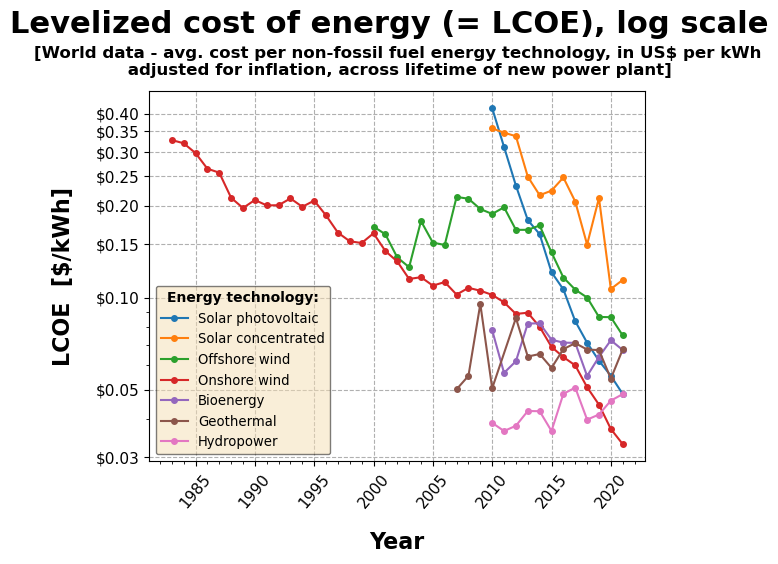

In [8]:
# 2) PLOTTING DATA WITH LOGARITHMIC Y-AXIS
# 
# -----------------------------------------------------

fig, ax = plt.subplots()

plt_titles = {
    'xlabel': 'Year',
    'ylabel': 'LCOE  [$/kWh]',
    'suptitle': 'Levelized cost of energy (= LCOE), log scale',
    'title': '[World data - avg. cost per non-fossil fuel energy technology, in US$ per kWh' \
             '\n adjusted for inflation, across lifetime of new power plant]'
}

# Iterate over the columns and plot each column
# = the annual LCOE data per energy type:
for energy_type, data in df_LCOE.items():
    
    # Change 'energy_type' string (from the column header)
    # for nice display in the legend:
    energy_type = energy_type.capitalize().replace('_', ' ')
    
    # Dropping missing LCOE values ensures that if a year
    # is missing (such as 2011 for Geothermal), the plotted
    # line still connects the previous and next year:
    data = data.dropna()
    
    # data.index will plot the years on the x-axis,
    # data are the actual LCOE data plotted on the y-axis:
    ax.plot(data.index, data,
            label=energy_type, linewidth=1.5, marker='.', markersize=8)


# Set font size of tick labels:
ax.tick_params(labelsize=11)

# Set the y-scale to logarithmic, with fixed ytick positions:
# import matplotlib.ticker   # (Already imported in start cell..)
ax.set_yscale('log')
ax.set_yticks([0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Format y-tick labels to display as $ amounts:
ax.yaxis.set_major_formatter('${x:1.2f}')

# Set x-axis ticks to show a major tick mark every 5 years:
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Set degrees of rotation of the x-tick labels (= years):
ax.tick_params(axis="x", labelrotation=50)

# Also show minor x-ticks in between:
# from matplotlib.ticker import AutoMinorLocator  # (Already imported in start cell..)
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Setting the axis labels; the labelpad property sets the distance to the chart:
ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.05, fontsize=22)
plt.title(plt_titles['title'], weight='bold', pad=12)

# Show legend (default position is inside, on the upper left)
# and y-grid:
ax.legend(
    loc='lower left',
    fontsize=9.5,
    facecolor='wheat',
    framealpha=0.5,
    edgecolor='k',
    title='Energy technology:',
    title_fontproperties={'weight': 'bold'}
)

ax.grid(True, linestyle = '--')

plt.show()
    

In [9]:
# PREPARATION: HELPER FUNCTIONS TO FACILITATE CALCULATING
# & PLOTTING A LINEAR REGRESSION LINE THROUGH THE DATA
# 
# 
# First defining the linear regression function:
# 
# Calculate the linear regression line, incl. the R^2 value = Coefficient of Determination
# (Or more accurately: the Pearson Correlation Coefficient (= R) squared).
# From: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# I used the code and answer from 'russian_spy', which has a good explanation of R^2 vs. r^2.
#
# # Alternative method to find R^2 that yields the same result:
#    import scipy
#    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y1, ffit1)
#    R_squared = r_value ** 2


# Helper function to get the linear regression line equation, line values and R^2 value:

def linear_regression(x, y, titles_dict, extend_x=[], kilo_bool=False): 
    try:
        
        # Set x_unit (string needed later for line equation string) to empty:
        x_unit = ''
        if kilo_bool==True:
            # The 'kilo_bool' input (True or False, default=False) indicates 
            # whether the x-parameter should first be expressed in 
            # units of 1,000 (and thus, divided by 1,000) before getting 
            # the cross-correlation results and line slope m.
            #
            # An example is the GDP, measured in constant 2011 international 
            # $-equivalent: divide this by 1000 to get the correlation 
            # results for the GDP measured in $1000 units [$K].
            x = x / 1000
            
            # In this assignment, only variables expressed in US$ will use the
            # 'kilo_bool=True' designator.  But if this function is repurposed in the 
            # future, remember to generalize for variables expressed in other
            # units as well:
            x_unit = ' [in $K]'
        
        # The '1' indicates that this is linear regression, i.e. a 1st degree polynomial:
        coefs = np.polynomial.polynomial.polyfit(x, y, 1)
        ffit = np.poly1d(coefs)
        
        # If the 'extend_x' input list variable has value(s) - default is no, so []
        # - then add those to the line_values.  This will extend the regression
        # line beyond the x, y input arrays.  Usually these will be future
        # years or other datetime values, so we can make extrapolations
        # from the regression line to predict future values:
        line_values = np.polynomial.polynomial.polyval([*x, *extend_x], coefs)
        
        
        # Slope of regression line, m:
        m = ffit[0]
        # Intercept of regression line, b:
        b = ffit[1]
        
        # Retrieve the xlabel and ylabel and remove substrings ' per capita'
        # and/or '\n' (or combinations thereof), if found:
        xlabel = titles_dict['xlabel']
        
        if xlabel.find(' per capita') != -1:
            xlabel = xlabel.replace(' per capita', '')
        elif xlabel.find('\nper capita ') != -1:
            xlabel = xlabel.replace('\nper capita ', '\n')
        elif xlabel.find('\nper capita') != -1:
            xlabel = xlabel.replace('\nper capita', '')
        
        # As matplotlib text does not recognice the '\t' glyph, 
        # use spaces instead, for neat formatting of next line:
        if xlabel.find('\n') != -1:
            xlabel = xlabel.replace('\n', '\n                          ')
        
        ylabel = titles_dict['ylabel']
        if ylabel.find(' per capita') != -1:
            ylabel = ylabel.replace(' per capita', '')        
        
        # Create string for line equation, dependent on value of slope m
        # (either negative, then equation with - sign; or positive, then with + sign).
        #
        # Slope m is rounded to 3 decimals.  But if its absolute value
        # is smaller than 0.005, then use scientific notation:
        if m < 0:
            if m < -0.005:
                eq_str = (ylabel + ' = {} - {} * ' + xlabel + x_unit).format(round(b, 2), round(abs(m), 3))
            else:
                eq_str = (ylabel + ' = {} - {m:.2e} * ' + xlabel + x_unit).format(round(b, 2), m = abs(m))
               
        else:
            if m < 0.005:
                eq_str = (ylabel + ' = {} + {m:.2e} * ' + xlabel + x_unit).format(round(b, 2), m = m)
            else:
                eq_str = (ylabel + ' = {} + {} * ' + xlabel + x_unit).format(round(b, 2), round(m, 3))
        
        # R value, as float and as string (rounded):
        r = np.corrcoef(x, y)[0, 1]
        r_str = f'R={r:1.3f}'
        
        # R^2 value, as float and as string (rounded):
        rsq = r ** 2
        rsq_str = f'R$^2$={rsq:1.2f}'
        
        # p-value, which is the calculated statistical chance that the
        # linear cross-correlation between x and y is smaller than R;
        # in other words, the smaller p is, the higher the probability
        # (namely, 1.0 - p) that x and y are indeed correlated, by 
        # at least R:
        p_val = pearsonr(x, y)[1]
        # p-value as string, formatted as:
        #   - either exactly 0
        #   - OR rounded with 4 decimals precision,
        #   - OR (if very close to 0) with scientific notation:
        if p_val == 0:
            p_val_str = 'p=0'
        elif p_val >= 0.001:
            p_val_str = f'p={round(p_val, 4)}'
        else:
            p_val_str = f'p={p_val:.2e}'
        
        # N, as integer and as string with thousand (,) separator:
        nr = len(x)
        nr_str = f'N={nr:,}'

        # Collect all calculated regression variables
        # (both the strings and floats) in a dict...:
        regression_vars = {
            'R_str': r_str,
            'R^2_str': rsq_str,
            'p_str': p_val_str,
            'N_str': nr_str,
            'equation_str': eq_str,
            'R': r,
            'R^2': rsq,
            'p': p_val,
            'N': nr,
            'slope': m,
            'intercept': b,
        }

        # ...and turn dict into a DF:
        df_regression_vars = pd.DataFrame(data=[regression_vars])
        
    except ValueError as error:
        print(f"Could not plot linear regression line because:\n{error}")
    
    return df_regression_vars, line_values


# --------------------------------------------------------------------------
# 
# Helper function to add regression line + text box to a plot:


def add_regression_lines(x, y, ax, titles_dict, extend_x=[], log10_y=False, kilo_bool=False):
    
    # Get correlation values from previous helper function:
    df_regression_vars, line_values = linear_regression(x, y, titles_dict, extend_x, kilo_bool)
    
    rsq_str = df_regression_vars.loc[0, 'R^2_str']
    p_str = df_regression_vars.loc[0, 'p_str']
    nr_str = df_regression_vars.loc[0, 'N_str']
    eq_str = df_regression_vars.loc[0, 'equation_str']
    
    # Check result:
    # m = df_regression_vars.loc[0, 'slope']
    # print(f'slope = {m}')
    
    
    # If the 'extend_x' list input variable has value(s) - default is no, so []
    # - then plot the regression line including the extra value(s).
    #
    # Note this can be a list with just a single x-value, in that case the line
    # will be extended (on one side) all the way to that value.
    # But more values are also allowed.  If the first value is smaller than
    # min(x) and the second value is larger than max(x), then the line
    # will be extended on both ends.
    #
    # Usually 'extend_x' will be (a) future year(s) or other datetime value(s),
    # so we can make extrapolations from the regression line to predict
    # future values:
    x_ext = [*x, *extend_x]
    
    # Plot linear regression line, either for a regular x,y plot
    # (= default input)...:
    if log10_y==False:
        regr_lines = ax.plot(x_ext, line_values, linewidth=2.5)
    #
    # ...or for a log-linear plot where the 'y' input values are log10 transformed;
    # in that case raise 10 to the power of the regression line_values,
    # in order to turn the regression line (which itself is the best-fit 
    # regression through the logarithmic y-values) back to regular y-values
    # for convenient plotting:
    else:
        regr_lines = ax.plot(x_ext, 10**line_values, linewidth=2.5)
    
#  COMMENTED OUT FOR USE IN ANSWERING QUESTION 3:
# 
#     # Create semi-transparent text box with the regression line
#     # and Pearson correlation results, in the top left corner with padding:
#     text = f'Linear regression line:\n{rsq_str}   /   {p_str}   /   {nr_str}\n{eq_str}'
#     ax.text(0.02, 0.975, text, transform=ax.transAxes, verticalalignment='top', 
#             c='red', weight='bold', fontsize = 11.5,
#             bbox={'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.6, 'pad':0.4})
    
    return df_regression_vars



In [10]:
# PREPARATION: SETTING COLORS

# To ensure that both the data points and the regression line
# through them are plotted in the same color for the same
# energy technology (bcs. all seven energy technologies are plotted 
# in the same chart), ensure that the plotted lines are always 
# recycled through the same seven colors.
# 
# That way, we can first plot the data points for each energy
# technology, and then (in the same order of colors) the regression
# lines for each energy technology.

# First define a longer tuple of default colors, in the order
# that we want to have them plotted:
colors=(
    '#1f77b4', # blue
    '#ff7f0e', # orange
    '#2ca02c', # green
    '#d62728', # red
    '#9467bd', # purple
    '#8c564b', # brown
    '#e377c2', # pink
    '#bcbd22', # light green
    '#17becf', # light blue
    '#7f7f7f', # grey
)

# Shorten this list to the same nr. of colors
# as there are columns (i.e., energy technologies)
# in the DF, i.e. seven:
color_list = list(colors[:len(df_LCOE.columns)])

# Make Matplotlib always cycle through these
# same seven colors:
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_list)


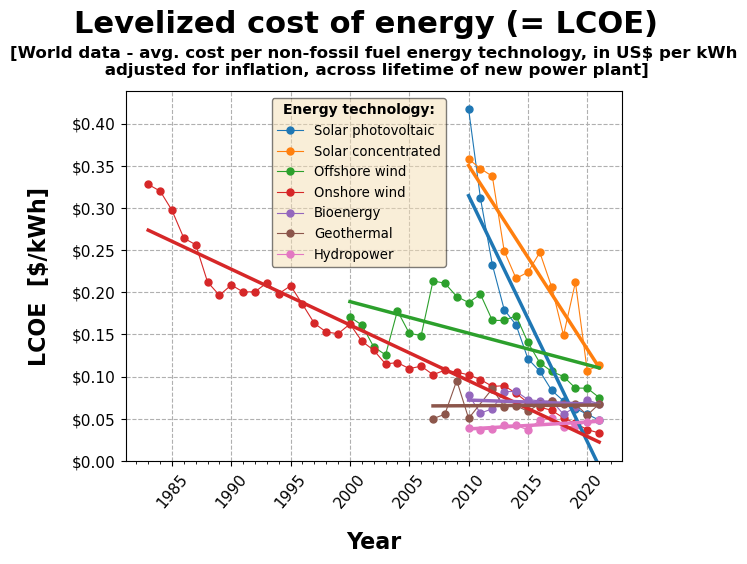

In [11]:
# 3) PLOTTING DATA WITH REGRESSION LINES & REGULAR Y-AXIS
# 
# -----------------------------------------------------

fig, ax = plt.subplots()

# Define dict of chart labels:
plt_titles = {
    'xlabel': 'Year',
    'ylabel': 'LCOE  [$/kWh]',
    'suptitle': 'Levelized cost of energy (= LCOE)',
    'title': '[World data - avg. cost per non-fossil fuel energy technology, in US$ per kWh' \
             '\n adjusted for inflation, across lifetime of new power plant]'
}

# Iterate over the columns and plot each column
# = the annual LCOE data per energy type,
# first the data points themselves...:
for energy_type, data in df_LCOE.items():
    
    # Change 'energy_type' string (from the column header)
    # for nice display in the legend:
    energy_type = energy_type.capitalize().replace('_', ' ')
    
    # Dropping missing LCOE values ensures that if a year
    # is missing (such as 2011 for Geothermal), the plotted
    # line still connects the previous and next year:
    data = data.dropna()
    
    # .index will plot the years on the x-axis,
    # data are the actual LCOE data plotted on the y-axis.
    #
    # Plot with thinner line and slightly larger markersize
    # than in the previous plots, to better accentuate the 
    # regression line that will also be plotted through the same
    # data points of this energy_type (with thicker linewidth of
    # 2.5, and same color) in the FOR loop below:
    ax.plot(data.index, data,
            label=energy_type, linewidth=0.8, marker='.', markersize=10)


# ...and then (for each column = energy type) plot the
# log-linear regression lines using the helper functions,
# in the same order of colors - see also comments in 
# the above cell, 'Setting colors':
for energy_type, data in df_LCOE.items():
    
    # Dropping missing values is even more important here,
    # bcs. the function 'add_regression_lines' - i.e., the
    # 'np.polynomial.polynomial.polyfit()' function in there -
    # will throw an error with any NaN values still present 
    # in the x- and/or y-vectors:
    data = data.dropna()
    
    add_regression_lines(data.index, data, ax, plt_titles)

# (P.S. for the above, the reason the data points and regression lines
# for each energy technology are plotted in two separate FOR loops
# rather than within the same FOR loop is because that way, it will
# recycle through the same 7 colors, in the same order, thus plotting
# the data points and regression line for each technology in the 
# same color.)

# Set font size of tick labels:
ax.tick_params(labelsize=11)

# Ensure that y-axis starts at 0 $/kWh:
ax.set_ylim(0, )

# Format y-tick labels to display as $ amounts:
ax.yaxis.set_major_formatter('${x:1.2f}')

# Set degrees of rotation of the x-tick labels (= years):
ax.tick_params(axis="x", labelrotation=50)

# Also show minor x-ticks in between:
# from matplotlib.ticker import AutoMinorLocator  # (Already imported in start cell..)
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Setting the axis labels; the labelpad property sets the distance to the chart:
ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.05, fontsize=22)
plt.title(plt_titles['title'], weight='bold', pad=12)

# Show legend; default position is inside on the upper left,
# so move more toward the top center to not interfere with
# the plotted lines:
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.47, 1),
    fontsize=9.5,
    facecolor='wheat',
    framealpha=0.5,
    edgecolor='k',
    title='Energy technology:',
    title_fontproperties={'weight': 'bold'}
)

# Show xy-grid:
ax.grid(True, linestyle = '--')


# ----------------------------------------------------------
# # Save figure as PNG file.  Notes:
# # 
# #  1) Commented out, use only when needed;
# #  2) Please replace 'fig_path' to the folder where you'd
# #      like to save the PNG file.

# fig_path = "Image_files/"
# fig_name = "Winc_Module_7_Assignment__Fig_4a.png"

# plt.savefig(
#     fig_path + fig_name,
#     dpi=500,
#     bbox_inches='tight'
# )
# ----------------------------------------------------------

plt.show()
    

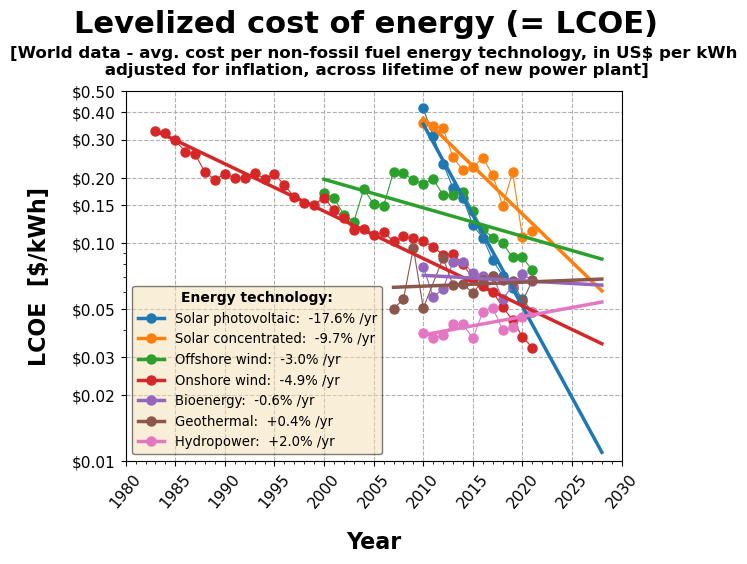

In [12]:
# 4) PLOTTING DATA WITH REGRESSION LINES & LOGARITHMIC Y-AXIS
# 
# -----------------------------------------------------

fig, ax = plt.subplots()

# Define dict of chart labels:
plt_titles = {
    'xlabel': 'Year',
    'ylabel': 'LCOE  [$/kWh]',
    'suptitle': 'Levelized cost of energy (= LCOE)',
    'title': '[World data - avg. cost per non-fossil fuel energy technology, in US$ per kWh' \
             '\n adjusted for inflation, across lifetime of new power plant]'
}

# Create empty DF to hold linear regression variables:
df_regression_vars = pd.DataFrame()

# Iterate over the columns and plot each column
# = the annual LCOE data per energy type,
# first the data points themselves...:
for energy_type, data in df_LCOE.items():
    
    # Change 'energy_type' string (from the column header)
    # for nice display in the legend:
    energy_type = energy_type.capitalize().replace('_', ' ')
    
    # Dropping missing LCOE values ensures that if a year
    # is missing (such as 2011 for Geothermal), the plotted
    # line still connects the previous and next year:
    data = data.dropna()
    
    # data.index will plot the years on the x-axis,
    # data are the actual LCOE data to be plotted on the y-axis;
    #
    # Linewidth and markersize are set to thick/large here,
    # to make the legend markers very clear (will be reset
    # later in the cell):
    ax.plot(data.index, data,
            label=energy_type, linewidth=2.5, marker='.', markersize=13)


# ...and then (for each column = energy type) plot the
# log-linear regression lines, using the helper functions,
# in the same order of colors - see also comments in 
# the above cell, 'Setting colors':
for energy_type, data in df_LCOE.items():
    
    # Dropping missing values is even more important here,
    # bcs. the function 'add_regression_lines' - i.e., the
    # 'np.polynomial.polynomial.polyfit()' function in there -
    # will throw an error with any NaN values still present 
    # in the x- and/or y-vectors:
    data = data.dropna()
    
    # Create a 1-row DF of the log-linear regression variables
    # for this energy type and plot the log-linear regression 
    # line through the data, extrapolated until 2028.  
    #
    # To calculate these, we first need to take the 10-based log
    # (= np.log10) of the LCOE data as the y-input, so that the
    # linear regression will show up as a straight line when plotting
    # the LCOE data on a logarithmic (i.e., 10-based log) y-axis:
    df_regr_vars_per_type = add_regression_lines(
        data.index, np.log10(data),
        ax, plt_titles, log10_y=True, extend_x=[2028]
    )
    
    # Set energy_type as index of the 1-row DF, and add
    # it as the next row to the larger 'df_regression_vars':
    df_regr_vars_per_type.index = [energy_type]
    df_regression_vars = pd.concat([df_regression_vars, df_regr_vars_per_type])

# (P.S. for the above, the reason the data points and regression lines
# for each energy technology are plotted in two separate FOR loops
# rather than within the same FOR loop is because that way, it will
# recycle through the same 7 colors, in the same order, thus plotting
# the data points and regression line for each technology in the 
# same color.)


# ---------------------------------------------------------
# 
#  ENHANCING THE DF WITH LINEAR REGRESSION VARIABLES:
# 
# Add a column 'annual_perc_change' (= apc) to the DF with regression variables,
# showing the annual change (as %) of each variable, calculated from the 
# regression lines, as follows:
# 
# As the y-values (i.e., LCOE) were log10-transformed, first we need to raise 10
# to the power of the regression line's slope, which gives the relative
# size of one year's LCOE compared to the previous year's LCOE.  Then subtract
# 1 and multiply by 100 to get the % change compared to the previous year.
# 
# For more details on how to interpret linear regression lines
# in log-transformed plots, see:
#  - https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf
#  - https://medium.com/swlh/log-transformations-in-linear-regression-the-basics-95bc79c1ad35
df_regression_vars['annual_perc_change'] = 100 * (
    10**df_regression_vars['slope'] - 1
)

# Save the colors used to plot each energy type as a
# separate column, for later use in the Table styler:
df_regression_vars['plotted_color'] = [
    color for color in colors[:len(df_regression_vars.index)]
]

# Make some enhancements to the DF, row by row:
for index, row in df_regression_vars.iterrows():
    
    # Change the equation string, to reflect that, in order to
    # calculate LCOE from the year, we need to raise 10 to
    # the power of the linear equation (see also explanation above):
    df_regression_vars.loc[index, 'equation_str'] = row.loc[
        'equation_str'
    ].replace(
        'LCOE  [$/kWh] = ', 'LCOE [$/kWh] = 10^('
    ) + ')'
    
    # Also make a string out of the annual % change (rounded to 1 decimal),
    # for use in the legenda.  If the % is positive, add a '+' to
    # the string, otherwise leave it as is, i.e. with the '-':
    if row.loc['annual_perc_change'] > 0:
        df_regression_vars.loc[index, 'apc_str'] = '+' + str(
            round(row.loc['annual_perc_change'], 1)
        ) + '% /yr'
    else:
        df_regression_vars.loc[index, 'apc_str'] = str(
            round(row.loc['annual_perc_change'], 1)
        ) + '% /yr'

# Move 'apc_str' column to new position in DF:    
df_regression_vars.insert(5, 'apc_str', df_regression_vars.pop('apc_str'))

# Sort DF by increasing apc, i.e. from negative to positive,
# so with the energy technologies for which the LCOEs are 
# decreasing the fastest (i.e., apc < 0) shown on top:
df_regression_vars = df_regression_vars.sort_values(
    by='annual_perc_change',
    ascending=True
)

# Check result:
# display(df_regression_vars)
# 
# ---------------------------------------------------------


# Set font size of tick labels on x- and y-axis:
ax.tick_params(labelsize=11)

# Make y-axis logarithmic and set custom tick positions:
# import matplotlib.ticker    # (Already imported in start cell..)
ax.set_yscale('log')
ax.set_yticks([0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Format y-tick labels to display as $ amounts:
ax.yaxis.set_major_formatter('${x:1.2f}')

# Set x-axis ticks to show major tick mark every 5 years:
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Also show minor x-ticks in between:
# from matplotlib.ticker import AutoMinorLocator    # (Already imported in start cell..)
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Set degrees of rotation of the x-tick labels (= years):
ax.tick_params(axis="x", labelrotation=50)

# Set min & max values for the x- and y-axis:
ax.set_xlim(1980, 2030)
ax.set_ylim(0.01, 0.5)

# Setting the axis labels; the labelpad property sets the distance to the chart:
ax.set_xlabel(plt_titles['xlabel'], weight='bold', fontsize=16, labelpad=15)
ax.set_ylabel(plt_titles['ylabel'], weight='bold', fontsize=16, labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle(plt_titles['suptitle'], weight='bold', y=1.05, fontsize=22)
plt.title(plt_titles['title'], weight='bold', pad=12)

# Get handles and labels for the legend:
handler, labeler = ax.get_legend_handles_labels()

# Modify the legend labels, to add the annual 
# percentage change (as string):
labeler2 = []

for label in labeler:
    label2 = label + ':  ' + df_regression_vars.loc[
        label.lower().replace(' ', '_'),
        'apc_str']
    labeler2.append(label2)

# Show legend  with the new labels:
ax.legend(
    handler, labeler2,
    loc='lower left',
    fontsize=9.5,
    facecolor='wheat',
    framealpha=0.5,
    edgecolor='k',
    title='Energy technology:',
    title_fontproperties={'weight': 'bold'},
)

# Above, in the first FOR loop when plotting the data points,
# I set the linewidth to 2.5, as a trick so that the legend 
# markers would become very clear.
# 
# However, to also clearly distinguish the scatterplot
# lines (the actual data) from the regression lines
# through them (shown as thick 2.5 lines), now let's
# set the linewidth of the ax handles (which only affects
# the scatterplot lines) to much thinner lines:
for handle in handler:
    handle.set_linewidth(0.8)

# Show grid:
ax.grid(True, linestyle = '--')


# ----------------------------------------------------------
# # Save figure as PNG file.  Notes:
# # 
# #  1) Commented out, use only when needed;
# #  2) Please replace 'fig_path' to the folder where you'd
# #      like to save the PNG file.

# fig_path = "Image_files/"
# fig_name = "Winc_Module_7_Assignment__Fig_4b.png"

# plt.savefig(
#     fig_path + fig_name,
#     dpi=500,
#     bbox_inches='tight'
# )
# ----------------------------------------------------------

plt.show()


In [13]:
# HELPER FUNCTIONS TO CALCULATE LCOE AND YEAR
# 
# 
# 1.  Function to calculate the LCOE in $/kWh by energy type
# and year, based on the equation of the regression line
# through the log10-transformed LCOE data.
# 
# In other words, this is the predicted/ extrapolated LCOE
# (expressed as 2021 US$, to adjust for inflation) in a certain year.
# 
# For explanation on how to interpret linear regressions
# through log-transformed values, see comments in previous 
# cell where chart was plotted + documentation links there.
# 
# The calculated LCOE is also converted to a string,
# either in scientific notation (for very large and very
# small values), or as $B, $M, or as $ with 2 or 3 decimals,
# depending on the value.

def calculate_LCOE_by_year(energy_type, year):
    
    LCOE = 10**(
        df_regression_vars.loc[energy_type, 'intercept'] + \
        df_regression_vars.loc[energy_type, 'slope'] * year
    )
    
    if LCOE >= 1e+12:
        LCOE_str = f'${LCOE:.1e}/kWh'
    
    elif LCOE >= 1e+9:
        LCOE_str = f'${LCOE*1e-9:1.1f}B'
    
    elif LCOE >= 1e+6:
        LCOE_str = f'${LCOE*1e-6:1.1f}M'
        
#     elif LCOE >= 1e+3:
#         LCOE_str = f'${round(LCOE, 2):,}'
        
    elif LCOE >= 0.0095:
        LCOE_str = f'${LCOE:,.2f}/kWh'
        
    elif LCOE >= 0.00095:
        LCOE_str = f'${LCOE:,.3f}/kWh'
        
    else:
        LCOE_str = f'${LCOE:.1e}/kWh'
    
    return LCOE, LCOE_str


# 2. Function to calculate the expected year in which an energy
# technology will first reach a certain LCOE target price, based on
# the log-linear regression equation for that technology.  The LCOE input
# (expressed in 2021 US$/kWh) should be provided as a float value.
# 
# By using floor division and then converting into an integer,
# the output year is given as a whole year:

def calculate_year_by_LCOE(energy_type, LCOE):
    
    year = (
        np.log10(LCOE) -\
        df_regression_vars.loc[energy_type, 'intercept']
    ) // df_regression_vars.loc[energy_type, 'slope']
    
    # Turn year from float into integer:
    year = int(year)
    
    # Determine earliest measurement year 
    # for this energy_type from its index:
    earliest_year = df_LCOE[energy_type].dropna().index.min()
    
    # If the calculated year of the target LCOE is PRIOR to the first
    # measurement year of the energy_type (i.e., before its first data point
    # in the chart), this means that the energy_type's LCOE (if its
    # regression line is flat or increasing):
    #
    #   1) has either already stabilized at a higher LCOE; and/or 
    #   2) has only been increasing since the first measurement year,
    #        and therefore, will never reach that lower target LCOE; or
    #   3) (if it's decreasing) was never measured at that higher LCOE.
    #
    # In that case, output string 'N/A':
    if year < earliest_year:
        year = 'N/A'

    return year



In [14]:
# ADDING COLUMNS TO 'df_regression_vars'
# 
# For each energy type, calculate the extrapolated
# LCOE (measured in 2021 US$) in 2023, 2030 and 2050,
# as well as the expected year that the LCOE will reach
# $0.01/kWh.  Add these calculations as strings to
# new columns of 'df_regression_vars':

for energy_type in df_regression_vars.index:
    
    year_1cent = calculate_year_by_LCOE(energy_type, 0.01)
    
    # For the LCOE calculation, we need to add index [1], to retrieve
    # the second value (the LCOE as string) from the function
    # output tuple:
    LCOE_2023 = calculate_LCOE_by_year(energy_type, 2023)[1]
    LCOE_2030 = calculate_LCOE_by_year(energy_type, 2030)[1]
    LCOE_2050 = calculate_LCOE_by_year(energy_type, 2050)[1]
    
    # Adding new columns to the DF:
    df_regression_vars.loc[energy_type, 'LCOE_2023'] = LCOE_2023
    df_regression_vars.loc[energy_type, 'LCOE_2030'] = LCOE_2030
    df_regression_vars.loc[energy_type, 'LCOE_2050'] = LCOE_2050
    
    # To prevent the year integers to be stored as float values
    # (bcs. of the mix in this column with the 'N/A' strings),
    # make it specific to store them as integers:
    if type(year_1cent)=='int':
        df_regression_vars.loc[energy_type, 'year_$0.01'] = int(year_1cent)
    else:
        df_regression_vars.loc[energy_type, 'year_$0.01'] = str(year_1cent)

# Move the newly added columns to new positions in the DF:
df_regression_vars.insert(6, 'LCOE_2023', df_regression_vars.pop('LCOE_2023'))
df_regression_vars.insert(7, 'LCOE_2030', df_regression_vars.pop('LCOE_2030'))
df_regression_vars.insert(8, 'LCOE_2050', df_regression_vars.pop('LCOE_2050'))
df_regression_vars.insert(9, 'year_$0.01', df_regression_vars.pop('year_$0.01'))

# Check result:
# display(df_regression_vars)


In [15]:
# COLUMN SELECTION FOR STYLIZED TABLE:
# 
# Making a selection of columns to display 
# in the final stylized Table of the report.
# 
# Since for some columns we will highlight certain
# values that stand out (i.e., conditional formatting
# based on those values), we need the actual float
# values of those columns, instead of their additional
# string representations that we created for them:

columns_to_show = [
    'R^2',
    'p',
    'N_str',
    'equation_str',
    'annual_perc_change'
] + list(
    df_regression_vars.columns[6:10]
) + [
    'plotted_color'
]

# Check result:
# columns_to_show


In [16]:
# Helper function to alternate row colors in the styled DF
# 
# *********************
# NOTE:  This function should always be explicitly called in combination with
# 'axis=1' or 'axis=columns', otherwise you'll get an error message
# (bcs. the default with .apply() is 'axis=0' which gives the error).
# 
# E.g.:  df_any.style.apply(alternate_row_colors, df=df_any, axis=1)
# 
# *********************
# 
# Inputs:
# 
#  * s = Series; each row of a DF, when function is called
#         with .apply(axis=1)
# 
#  * df = DataFrame - should be the same DF (or subsection thereof)
#         that .style.apply() is called on.  Ensures that this 
#         function also works when the DF has a labeled index, 
#         bcs. in that case the index labels first need to be
#         converted to row numbers.
#         (Note: if a DF already has an index of ordered integers,
#         it could technically work with or without this addition.
#         But still a required input in this function.)
# 
#  * color = any desired background color to highlight rows
#           (default: '#DDEBF7' = light blue)
# 
#  * startrow = first row from above to be highlighted (default: 1,
#               this will highlight the 2nd, 4th, 6th, etc. rows.)
 
def alternate_row_colors(s, df, color='#DDEBF7', startrow=1):
        
    row_nr = df.index.get_loc(s.name)
    # print(f'row nr. = {row_nr}')
    
    cstring = [f'background-color: {color}' if (
        row_nr>=startrow
    ) & (
        (row_nr + startrow)%2==0
    ) else '' for v in s]
       
    return cstring


In [17]:
# CREATING SEPARATE DF FOR THE STYLIZED TABLE
# 

dfs = df_regression_vars.loc[:, columns_to_show]

# For easier handling with the later pandas styler functions,
# move the labeled index (the 7 energy types) to the
# first column, automatically named as 'index':
dfs = dfs.reset_index()

# Change the coded energy labels to nice strings:
dfs['index'] = dfs[
    'index'
].str.capitalize(
).str.replace(
    '_', ' '
)

# Check result:
dfs


,index,R^2,p,N_str,equation_str,annual_perc_change,LCOE_2023,LCOE_2030,LCOE_2050,year_$0.01,plotted_color
0,Solar photovoltaic,0.9831182031,3.3983760511e-10,N=12,LCOE [$/kWh] = 10^(168.03 - 0.084 * Year),-17.5525372156,$0.03/kWh,$0.007/kWh,$1.6e-04/kWh,2028,#1f77b4
1,Solar concentrated,0.8370516899,3.0419523096e-05,N=12,LCOE [$/kWh] = 10^(88.22 - 0.044 * Year),-9.6560065529,$0.10/kWh,$0.05/kWh,$0.006/kWh,2045,#ff7f0e
2,Onshore wind,0.9479603966,2.3882474711e-25,N=39,LCOE [$/kWh] = 10^(42.67 - 0.022 * Year),-4.8868389012,$0.04/kWh,$0.03/kWh,$0.01/kWh,2052,#d62728
3,Offshore wind,0.4091197092,1.3487334363e-03,N=22,LCOE [$/kWh] = 10^(25.48 - 0.013 * Year),-2.9698130795,$0.10/kWh,$0.08/kWh,$0.04/kWh,2098,#2ca02c
4,Bioenergy,0.0248493465,6.2463494393e-01,N=12,LCOE [$/kWh] = 10^(3.87 - 2.50e-03 * Year),-0.5731923440,$0.07/kWh,$0.06/kWh,$0.06/kWh,2351,#9467bd
5,Geothermal,0.0107222831,7.2463638051e-01,N=14,LCOE [$/kWh] = 10^(-4.83 + 1.81e-03 * Year),0.4170388024,$0.07/kWh,$0.07/kWh,$0.08/kWh,N/A,#8c564b
6,Hydropower,0.3806081279,3.2605054952e-02,N=12,LCOE [$/kWh] = 10^(-18.3 + 0.008 * Year),1.9520080833,$0.05/kWh,$0.06/kWh,$0.08/kWh,N/A,#e377c2


In [18]:
# MAKING CUSTOMIZED COLORMAP
# 
# 
# Make custom colormap - with red-orange-green transition to
# indicate low-to-high values (or reversed) - for use with
# stylized table below.
# 
# Adjusted from:
# https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from colorspacious import cspace_converter

# DEFINE COLORS:
my_colors = [
    'red',
    'darkorange',
    'lawngreen',
    'darkgreen'
]

# ------------------------------------------
# DEFINE NODES (OPTIONAL):
# 
# This allows to indicate where on a 0-to-1 scale each color appears,
# i.e., how much "bandwidth" each transisition from one color
# to the next takes up, and thus which colors "dominate" the map.
# 
# P.S. you need the same nr. of nodes as colors, otherwise you'll get an error.
nodes = [
    0.0,
    0.11,
    0.15,
    1.0
]

# CREATE CUSTOM MAP:
my_cmap = LinearSegmentedColormap.from_list(
    'my_cmap',
    list(
        zip(nodes,
            my_colors)
    )
)

# MAKE A REVERSED MAP AS WELL:
my_cmap_r = my_cmap.reversed()

# REGISTERING:
# 
# The custom colormaps need to be registered into MatPlotLib
# before we can call them:
mpl.colormaps.register(cmap=my_cmap)
mpl.colormaps.register(cmap=my_cmap_r)


In [19]:
# APPLY STYLING TO THE TABLE
# 
# 
# For use as a Table in the final report, make the DF into
# a nicely formatted table, using CSS/HTML styling with
# the built-in pandas .style() styler methods.
# 
# This to make the Table visually pleasing,
# but also very easy to read and self-explanatory,
# by highlighting certain values (making those stand out),
# by using colors, fontweight, proper string and float
# formats, using a custom green-to-red color gradient 
# (defined above) for the 'annual_percentage_change' column, etc.
# 
# Inspiration for this was drawn from these excellent Medium
# articles and pandas documentation:
#  - https://towardsdatascience.com/make-your-tables-look-glorious-2a5ddbfcc0e5
#  - https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0
#  - https://towardsdatascience.com/a-quick-and-easy-guide-to-conditional-formatting-in-pandas-8783035071ee
#  - https://mane-aajay.medium.com/style-your-pandas-dataframe-and-make-it-stunning-1e956d4a6672
#  - https://pandas.pydata.org/docs/user_guide/style.html 
# 
# Also note that pandas "method chaining", as described in
#        https://note.nkmk.me/en/python-method-chain-line-break/
# ...was used, with one very long line of code; which allows for
# easier commenting on - and visual separation of - each code block,
# to increase code readability.


# First make a list of DF column headers, for use in
# the styler (later on in the .relabel_index() part):
cols = [*dfs.columns]


Table = dfs.style.set_properties(
#     Separate the DF columns by giving
#     EACH cell in the DF a right border; note this
#     ONLY affects the cells in the DF, not
#     yet the column headers:
    **{
        'border-right': '1px solid black'
        }

).set_properties(
#     Left-align the strings in some columns,
#     Center-align them in a few others,
#     and keep the remaining columns as right-aligned
#     (= default) for optimal readability:
    **{
        'text-align': 'left'
        },
    subset=[
        'p',
        'equation_str'
    ]
).set_properties(
    **{
        'text-align': 'center'
        },
    subset=[
        'R^2',
        'N_str',
        'year_$0.01'
        ]
    
).applymap_index(
#     As the above only text-aligned strings in the DF cells
#     but not in the column headers, we need to do
#     the same with a separate styling function
#     just for the index:
#     .applymap_index()
#     
#     (and 'axis=1' indicates the column headers here;
#      since we will hide the row index later, no need
#      to specify a border there):
    lambda col: 'text-align: left'
    if col in [
        'p',
        'equation_str'
        ]
    else '',
    axis=1
    
).applymap_index(
    lambda col: 'text-align: center'
    if col in [
        'R^2',
        'N_str',
        'annual_perc_change',
        'year_$0.01',
        'LCOE_2023',
        'LCOE_2030',
        'LCOE_2050'
    ]
    else '', 
    axis=1
    
).applymap_index(
#     Also the right column borders need to
#     be specified separately for the column
#     headers, with the same function
#     .applymap_index().
#     
#     As we already assigned the former row index
#     (= Energy type) to the left-most column
#     now named 'index' - for easier handling
#     in this styling operation -, make the right border
#     for that 1st column thicker than the others,
#     by using a nested lambda function.
#     
#     And make the border bottom for the entire
#     column header "top row" thicker as well, for better
#     demarcation:    
    lambda col: (
        'border-right: 2.2px solid black; '
        'border-bottom: 2.2px solid black'
    )
    if col=='index'
    else (
    'border-right: 1px solid black; '
    'border-bottom: 2.2px solid black'
    ),
    axis=1
    
).applymap_index(
#     Also slightly increase the font size
#     for all column headers;
#     and give them a light-grey background color:
    lambda col: (
        'font-size: 13px; '
#         'background-color: #E8E8E8'
        'background-color: #E2E2E2'
    ),
    axis=1
    
).applymap(
#     For the reasons mentioned above, now also
#     make the right border for ALL cells of the
#     1st column, with the energy types
#     (header was done above), slightly thicker,
#     so it becomes clearer that this column acts
#     as the row index in the stylized table:
    lambda border: (
        'border-right: 2.2px solid black'
    ),
    subset=[
        'index'
    ]
    
).applymap(
#     Make the font for column 'equation_str'
#     slightly larger, to make the superscripted
#     part in the equation (10 to the power of..)
#     easier to read:
    lambda font_sz: (
        'font-size: 12.7px'
    ),
    subset=[
        'equation_str'
    ]

).applymap(
#     Make the cell values bold for 2 columns,
#     to make them stand out; as these are the
#     two most important columns of the Table:
    lambda font_wt: (
        'font-weight: bold'
    ),
    subset=[
        'index',
        'annual_perc_change'
    ]
    
).applymap(
#     Make R^2 values smaller or equal than 0.20
#     (= questionable linear correlation) bold red,
#     and values larger than 0.80 (=very good correlation)
#     bold green, using a lambda function with 
#     nested IF..ELSE.. statement.
#     
#     And leave R^2 values between 0.2 and 0.8 as is:
    lambda R2: (
        'color: red; '
        'font-weight: bold'
    )
    if R2<=0.2
    else ((        
            'color: green; '
            'font-weight: bold'
        )
        if R2>=0.8
        else ''
    ),
    subset=[
        'R^2'
    ]
    
).applymap(
#     Do the same for p-values = the statistical
#     significance of the linear cross-correlations:
#     
#     - Make values larger than 0.05 (=5%, generally considered
#        to be not statistically significant) bold red -
#        so the reader is alerted to take those results
#        in the table with a grain of salt;
#     
#     - And values < 0.01 (= there is a smaller than 1% chance
#        that the found correlation is NOT valid) bold green:
    lambda p: (
        'color: red; '
        'font-weight: bold'
    )
    if p>0.05
    else ((
        'color: green; '
        'font-weight: bold'
        )
        if p<=0.01
        else ''
    ),
    subset=[
        'p'
    ]
    
).apply(
#     Custom function from earlier cell to alternate row colors
#     for better readability, starting at 2nd row
#     (startrow=1):
    alternate_row_colors, df=dfs, startrow=1, axis=1

).apply(
#     For the 'index column' (= energy technology),
#     make it stand out further, by increasing the font
#     size, changing the font type and italicizing.
#     
#     Also make the font color the same as its plotted color
#     in the chart.  Note that we need to use .apply(axis=0)
#     instead of .applymap() here, bcs. we're providing
#     a LIST of 7 different colors to this column:
    lambda plot_clr: [
        'font-size: 14.8px; '
        'font-family: sans-serif;'
        'font-style: italic; '
        f'color: {clr}' for clr in dfs['plotted_color']
    ],
    axis=0,
    subset=[
        'index'
    ]

).format(
#     Define custom number and string formats for 4 columns:
#      - For two columns, use CSS code <sup></sup> to display
#           superscripts:
#      - for 'p', use scientific notation for very small values,
#          otherwise 4 digits precision;
#      - for 'annual_perc_change', add a '+' in front, only for positive
#          numbers;

    {
        'R^2': 'R<sup>2</sup>={:.2f}',
        'p': lambda p: 'p={:.4f}'.format(p) if p>=0.00009
                    else 'p={:.2e}'.format(p),
        'equation_str': lambda eq: eq.replace(
                        '10^','10<sup> ').replace(
                        ')', ')</sup>'
                    ),
        'annual_perc_change': lambda x:'{:.1f}% /yr'.format(x) if x<=0
                    else '+{:.1f}% /yr'.format(x)
    }

).relabel_index(
#     Relabel column names for proper display of the header row
#     in the Table:
#      - The 'index' column gets an empty string, to indicate
#           that the energy types are the Table's index
#      - Instead of \n, use <br> to force new lines inside 
#           a header, since the pandas styler works with CSS
#      - Likewise, use CSS code <sup></sup> to display
#           superscripts for R^2 ( as 'R$^2$' doesn't
#           work when exporting the stylized Table as PNG)
#      - The Unicode for the Delta sign is \u0394.
# 
#     Relabeling of each column can be accomplished by
#     using a nested list comprehension to change any
#     column names (without affecting the original DF) that
#     we want to change for display in the Table, while
#     keeping any remaining column names the same:
#     
    ['' if col=='index' else
     'R<sup>2</sup>' if col=='R^2' else
     'p-value' if col=='p' else
     'N' if col=='N_str' else
     'Log-linear regression equation'
             if col=='equation_str' else
     'Annual<br>\u0394 LCOE'
             if col=='annual_perc_change' else
     'LCOE in<br>2023' if col=='LCOE_2023' else
     'LCOE in<br>2030' if col=='LCOE_2030' else
     'LCOE in<br>2050' if col=='LCOE_2050' else
     'Year when<br>LCOE =<br>$0.01 /kWh' 
             if col=='year_$0.01' else
     col for col in cols],
    axis=1
    
).hide(
#     Hide the index (which now has only row numbers) 
#     for better readibility:
    axis='index'
    
).hide(
#     Also hide the 'plotted_color' column.
#     
#     If you want to hide any additional column(s)
#     (e.g. to make the dataframe_image.export()
#     function work in the cell below), you can
#     uncomment them here:
    axis='columns',
    subset=[
        'plotted_color',
#         'R^2',
#         'p',
#         'N_str',
#         'equation_str',
#         'annual_perc_change',
#         'LCOE_2023',
#         'LCOE_2030',
#         'LCOE_2050',
#         'year_$0.01',
    ]

).background_gradient(
#     Apply the custom reversed red-to-green colormap
#     (defined in earlier cell), so with green for low
#     (i.e. negative) and red for high values, to the
#     'annual_perc_change' column (as background color).
#     
#     This to highlight energy technologies with the 
#     best price decreases = negative Delta LCOE values,
#     measured in %/year:
    cmap='my_cmap_r',
    subset=[
        'annual_perc_change'
    ]

).set_table_styles(
#     Finally, put a thick black border around
#     the entire Table:
    [
        {'selector': '',
         'props': [('border',
                    '2.2px solid black')]
         }
    ]
)


# Check result:
display(Table)


,R2,p-value,N,Log-linear regression equation,AnnualΔ LCOE,LCOE in2023,LCOE in2030,LCOE in2050,Year whenLCOE =$0.01 /kWh
Solar photovoltaic,R2=0.98,p=3.40e-10,N=12,LCOE [$/kWh] = 10 (168.03 - 0.084 * Year),-17.6% /yr,$0.03/kWh,$0.007/kWh,$1.6e-04/kWh,2028
Solar concentrated,R2=0.84,p=3.04e-05,N=12,LCOE [$/kWh] = 10 (88.22 - 0.044 * Year),-9.7% /yr,$0.10/kWh,$0.05/kWh,$0.006/kWh,2045
Onshore wind,R2=0.95,p=2.39e-25,N=39,LCOE [$/kWh] = 10 (42.67 - 0.022 * Year),-4.9% /yr,$0.04/kWh,$0.03/kWh,$0.01/kWh,2052
Offshore wind,R2=0.41,p=0.0013,N=22,LCOE [$/kWh] = 10 (25.48 - 0.013 * Year),-3.0% /yr,$0.10/kWh,$0.08/kWh,$0.04/kWh,2098
Bioenergy,R2=0.02,p=0.6246,N=12,LCOE [$/kWh] = 10 (3.87 - 2.50e-03 * Year),-0.6% /yr,$0.07/kWh,$0.06/kWh,$0.06/kWh,2351
Geothermal,R2=0.01,p=0.7246,N=14,LCOE [$/kWh] = 10 (-4.83 + 1.81e-03 * Year),+0.4% /yr,$0.07/kWh,$0.07/kWh,$0.08/kWh,N/A
Hydropower,R2=0.38,p=0.0326,N=12,LCOE [$/kWh] = 10 (-18.3 + 0.008 * Year),+2.0% /yr,$0.05/kWh,$0.06/kWh,$0.08/kWh,N/A


In [20]:
# LCOE CALCULATOR:
# 
# You can use this cell to quickly calculate the LCOE
# for any renewable (decapitalized and with spaces replaced by _)
# in a specific year, both the exact float value and a string
# of the rounded value.

calculate_LCOE_by_year('geothermal', 2023)
calculate_LCOE_by_year('solar_photovoltaic', 2050)



(0.00015681694852630448, '$1.6e-04/kWh')

In [21]:
# EXPORTING THE TABLE AS PNG FILE
# 
# 
# Using the 'dataframe_image' library (which needs
# to be installed first), we can export stylized DFs
# as *.png image files to a desired location.
# 
# While this does work, I did run into some bugs with
# this library (in April 2023).  It only works with a limited
# number of columns or characters: e.g., after hiding a few
# columns in the styler function in the cell above
# (uncomment those column names to hide them, in .hide() above)
# it does export the PNG file OK, although with an error
# message.
# 
# But with ALL the columns that I want in the export, it gives
# a very long error message.  Since I'm using a Linux OS (and saw
# on an online forum somewhere that this library has some known
# problems with Linux), that may be the culprit.
# 
# So commented out below, but kept in this Notebook for reference
# purposes, in case this bug gets solved in the future.
# I just made a screenshot of the Table, which I saved as image file
# for use in the report.
# 
# Documentation on 'dataframe_image' library:
#  - https://www.dexplo.org/dataframe_image/
#  - https://github.com/dexplo/dataframe_image


# -------------------------------------------------------------------
# import dataframe_image as dfi
# import os

# # Please replace with path string to your own desired folder:
# export_destination = '/home/.../'

# dfi.export(
#     Table,
#     os.path.join(
#         export_destination,
#         'LCOE_table.png'
#     ),
#     max_cols=-1,
#     
# # P.S. table_conversion="matplotlib" and "selenium"
# #   also export the "raw" DF to a PNG file (and for those there
# #   seem to be no restrictions to the nr. of columns), but
# #   currently do not save the styler formatting.  That may be
# #   another bug in the library.
# 
#   
# #     table_conversion="matplotlib",
# #     table_conversion="selenium",
#     table_conversion="chrome",
# )

